In [1]:
import os
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import ScalarFormatter

## Bitwise Encoding

In [16]:
bitwise = []
bitwise_bump_false = []
bitwise_reduceint_200 = []
bitwise_vivify_false = []
bitwise_reverse_true = []
bitwise_elim_false = []
bitwise_subsume_false = []
bitwise_restoreflush_true = []
bitwise_minimize_false = []

for i in range(100, 550, 50):
    filename = f"cadical_output{i}.tmp"
    n = i
    k = 1000
    subprocess.run([f'echo {n} {k} | ./a.out'], shell=True, check=True)

    commands = [
        ("", bitwise),  
        ("--bump=false", bitwise_bump_false),
        ("--reduceint=200", bitwise_reduceint_200),
        ("--vivify=false", bitwise_vivify_false),
        ("--reverse=true", bitwise_reverse_true),
        ("--elim=false", bitwise_elim_false),
        ("--subsume=false", bitwise_subsume_false),
        ("--restoreflush=true", bitwise_restoreflush_true),
        ("--minimize=false", bitwise_minimize_false)
    ]

    for option, result_list in commands:
        cmd = f'./cadical bitwise_encoding.txt {option} --lucky=false | grep -A 5 "resources" | tail -n 4 | head -n 3'
        subprocess.run([cmd], shell=True, stdout=open(filename, 'w'))

        with open(filename, 'r') as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            lines = [line.split() for line in lines]
            lines = [item for sublist in lines for item in sublist]
            lines = [float(line) for line in lines if line.replace('.', '', 1).isdigit()]
            result_list.append(lines)
print("done")

Input n and k :Sat rows
0
1
2
4
8
9
10
14
18
20
23
25
28
31
36
37
38
41
43
44
45
46
49
51
52
54
55
56
57
58
60
61
62
65
67
68
69
71
72
74
75
76
77
78
84
86
87
88
89
90
91
93
96
Matrix Generated
Input n and k :Sat rows
2
7
9
11
13
16
17
19
20
21
22
24
25
29
31
35
36
38
40
41
43
44
45
46
49
50
51
53
54
56
57
58
59
61
62
64
65
68
71
72
73
74
75
76
77
79
80
84
85
86
87
88
89
91
94
95
96
97
100
101
102
103
107
110
112
113
114
115
116
118
119
121
123
124
125
131
132
133
138
140
141
144
145
146
147
148
149
Matrix Generated
Input n and k :Sat rows
0
1
2
5
6
8
9
10
11
15
16
17
19
20
21
22
23
24
25
26
28
29
30
32
33
34
35
37
38
39
41
43
44
46
47
49
50
51
52
56
57
61
62
63
66
67
68
70
71
73
74
75
78
79
80
81
83
84
85
86
88
89
90
91
92
93
94
96
98
99
100
103
107
109
111
112
113
116
117
119
120
121
122
128
130
133
134
135
136
137
145
147
148
149
150
151
152
153
154
155
156
157
158
159
162
163
164
165
168
169
170
174
175
176
179
180
181
183
184
185
186
187
188
189
190
191
192
193
194
195
197
198
199

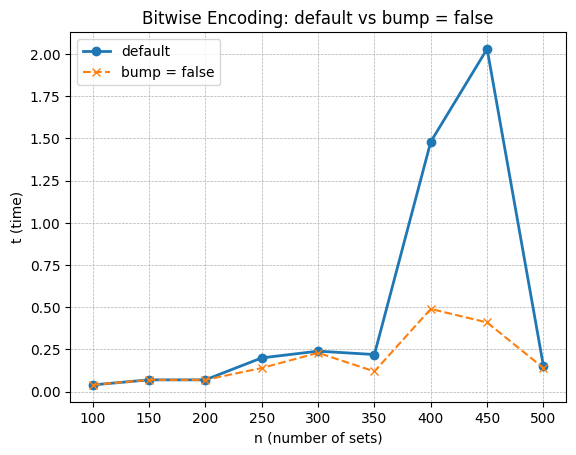

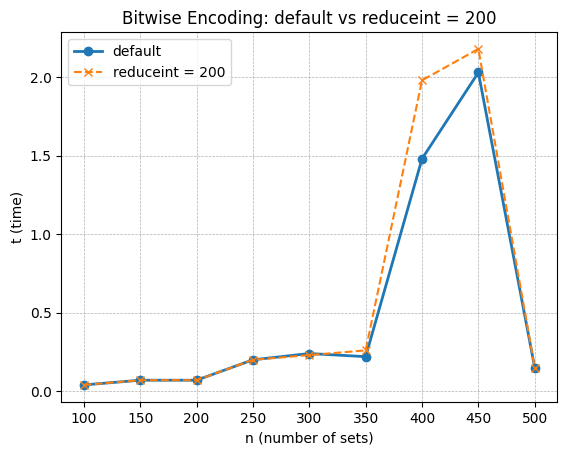

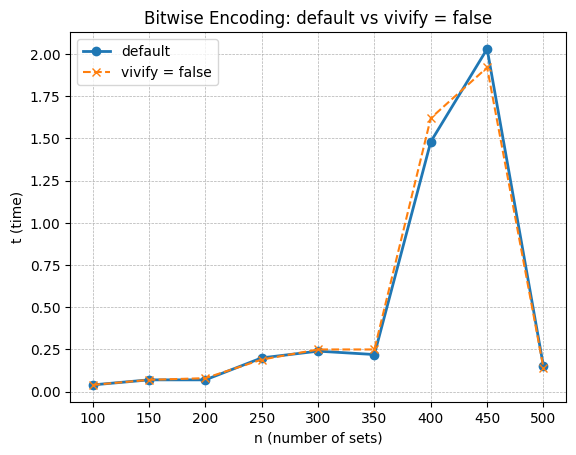

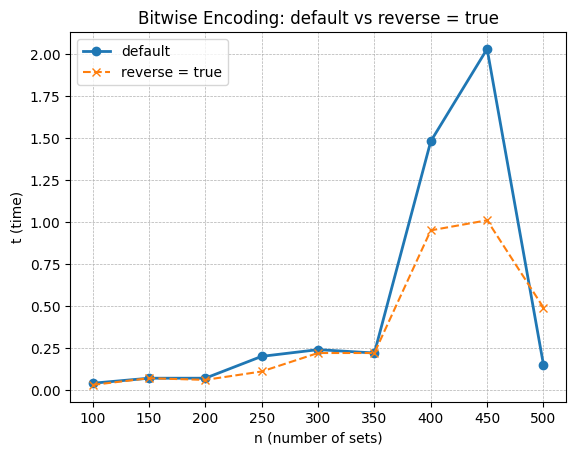

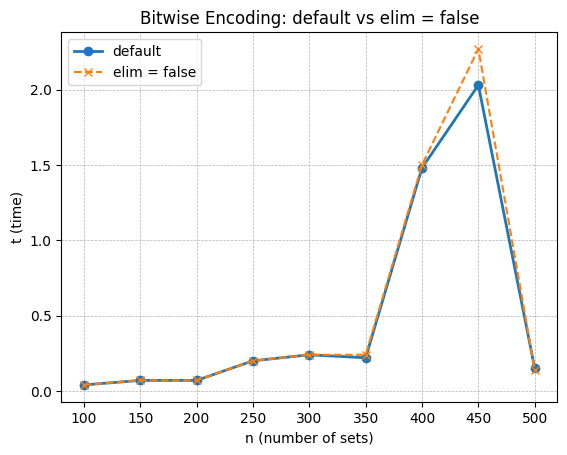

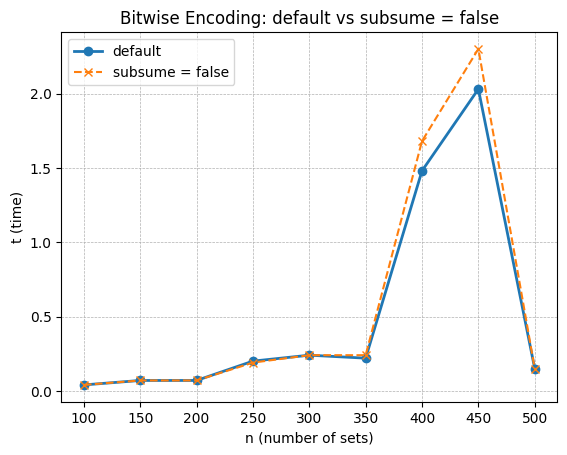

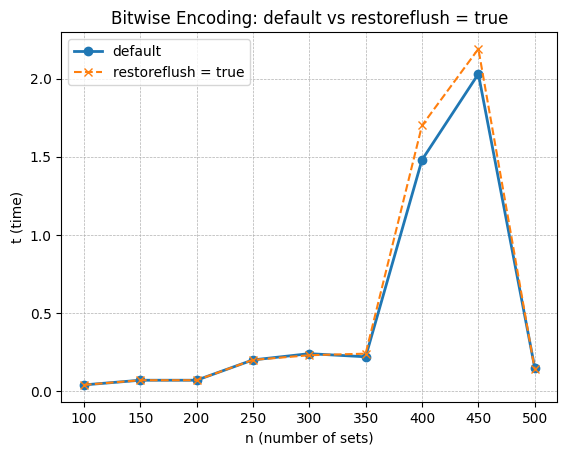

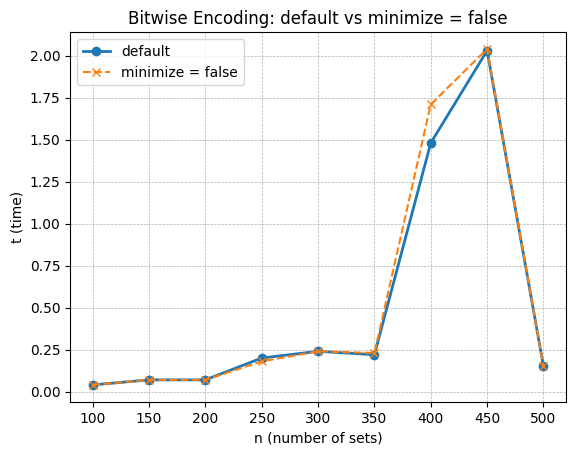

In [20]:
x_pts_k = [i for i in range(100, 550, 50)]

y_bitwise = [h[0] for h in bitwise]
y_bump_false = [h[0] for h in bitwise_bump_false]
y_reduceint_200 = [h[0] for h in bitwise_reduceint_200]
y_vivify_false = [h[0] for h in bitwise_vivify_false]
y_reverse_true = [h[0] for h in bitwise_reverse_true]
y_elim_false = [h[0] for h in bitwise_elim_false]
y_subsume_false = [h[0] for h in bitwise_subsume_false]
y_restoreflush_true = [h[0] for h in bitwise_restoreflush_true]
y_minimize_false = [h[0] for h in bitwise_minimize_false]

parameters = [
    (y_bump_false, "bump = false"),
    (y_reduceint_200, "reduceint = 200"),
    (y_vivify_false, "vivify = false"),
    (y_reverse_true, "reverse = true"),
    (y_elim_false, "elim = false"),
    (y_subsume_false, "subsume = false"),
    (y_restoreflush_true, "restoreflush = true"),
    (y_minimize_false, "minimize = false"),
]

for y_param, label in parameters:
    plt.figure()
    plt.plot(x_pts_k, y_bitwise, label="default", linestyle='-', marker='o', linewidth=2)
    plt.plot(x_pts_k, y_param, label=label, linestyle='--', marker='x')

    formatter = ScalarFormatter(useOffset=True)
    formatter.set_scientific(True)
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.xlabel('n (number of sets)')
    plt.ylabel('t (time)')
    plt.title(f'Bitwise Encoding: default vs {label}')

    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


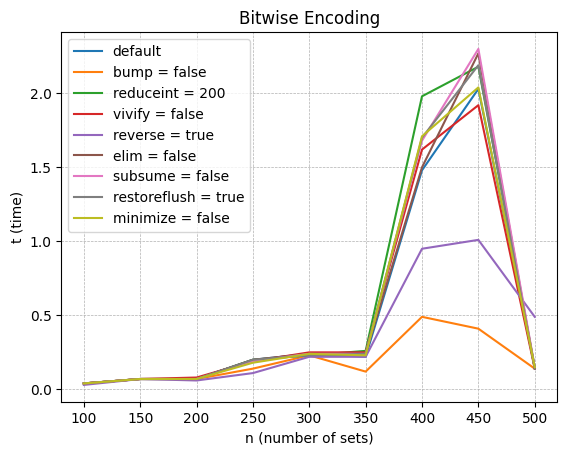

In [21]:
plt.plot(x_pts_k, y_bitwise, label="default")
plt.plot(x_pts_k, y_bump_false, label="bump = false")
plt.plot(x_pts_k, y_reduceint_200, label="reduceint = 200")
plt.plot(x_pts_k, y_vivify_false, label="vivify = false")
plt.plot(x_pts_k, y_reverse_true, label="reverse = true")
plt.plot(x_pts_k, y_elim_false, label="elim = false")
plt.plot(x_pts_k, y_subsume_false, label="subsume = false")
plt.plot(x_pts_k, y_restoreflush_true, label="restoreflush = true")
plt.plot(x_pts_k, y_minimize_false, label="minimize = false")

formatter = ScalarFormatter(useOffset=True)
formatter.set_scientific(True)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('n (number of sets)')
plt.ylabel('t (time)')
plt.title('Bitwise Encoding')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


## PairWise Encoding

In [22]:
pairwise = []
pairwise_bump_false = []
pairwise_reduceint_200 = []
pairwise_vivify_false = []
pairwise_reverse_true = []
pairwise_elim_false = []
pairwise_subsume_false = [] 
pairwise_restoreflush_true = []
pairwise_minimize_false = [] 

for i in range(100, 550, 50):
    filename = f"cadical_output{i}.tmp"
    n = i
    k = 1000
    subprocess.run([f'echo {n} {k} | ./a.out'], shell=True, check=True)

    commands = [
        ("", pairwise),  
        ("--bump=false", pairwise_bump_false),
        ("--reduceint=200", pairwise_reduceint_200),
        ("--vivify=false", pairwise_vivify_false),
        ("--reverse=true", pairwise_reverse_true),
        ("--elim=false", pairwise_elim_false),
        ("--subsume=false", pairwise_subsume_false), 
        ("--restoreflush=true", pairwise_restoreflush_true), 
        ("--minimize=false", pairwise_minimize_false) 
    ]

    for option, result_list in commands:
        cmd = f'./cadical pairwise_encoding.txt {option} --lucky=false | grep -A 5 "resources" | tail -n 4 | head -n 3'
        subprocess.run([cmd], shell=True, stdout=open(filename, 'w'))

        with open(filename, 'r') as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            lines = [line.split() for line in lines]
            lines = [item for sublist in lines for item in sublist]
            lines = [float(line) for line in lines if line.replace('.', '', 1).isdigit()]
            result_list.append(lines)

print("done")


Input n and k :Sat rows
17
34
37
65
96
97
Matrix Generated
Input n and k :Sat rows
0
4
6
10
14
15
20
30
31
33
34
35
36
37
38
42
49
51
54
55
56
60
62
63
64
65
71
77
80
81
83
84
86
88
90
93
96
97
100
101
104
105
109
113
115
117
118
121
126
128
130
138
140
143
145
146
147
149
Matrix Generated
Input n and k :Sat rows
4
6
7
12
13
18
19
22
23
24
26
27
30
31
33
39
40
41
42
45
46
47
49
52
53
56
64
65
67
68
69
70
72
77
79
80
85
86
87
88
89
90
91
92
93
96
101
104
105
106
108
116
119
120
123
124
126
132
133
135
136
137
139
140
141
142
143
147
150
151
157
159
161
163
167
168
170
171
172
173
174
180
181
182
183
184
186
189
192
193
194
195
196
197
199
Matrix Generated
Input n and k :Sat rows
4
10
21
29
30
33
43
44
46
60
65
69
71
75
76
78
88
97
104
105
106
128
129
130
140
157
160
161
163
171
172
175
176
178
182
187
189
214
221
225
232
233
237
239
241
243
Matrix Generated
Input n and k :Sat rows
0
1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
18
19
20
21
22
23
24
25
26
27
28
30
31
32
34
35
36
38
39
40
41
42
43

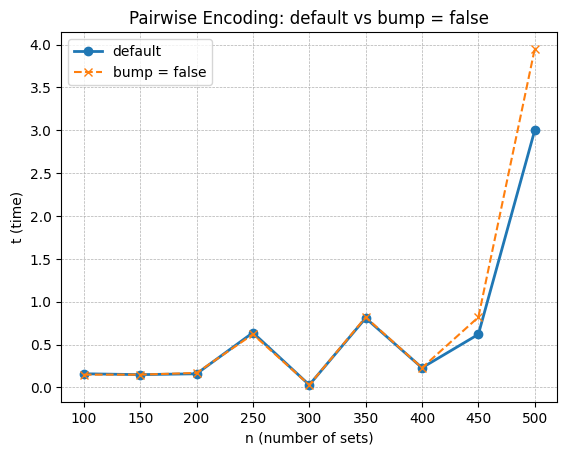

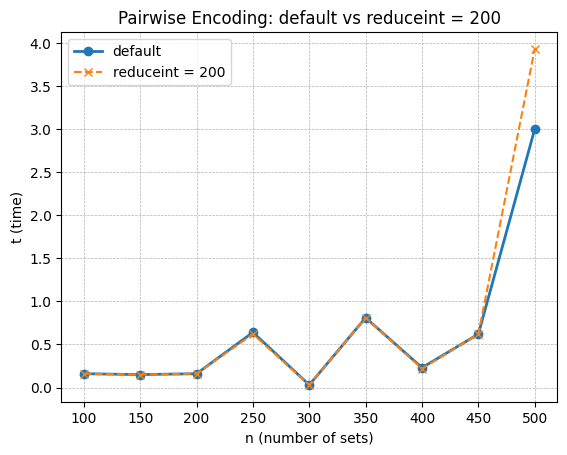

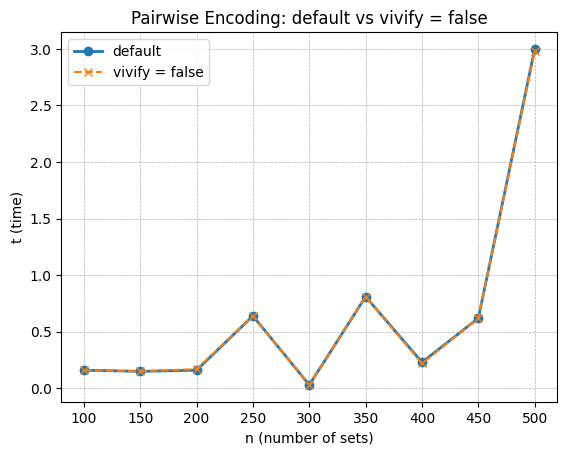

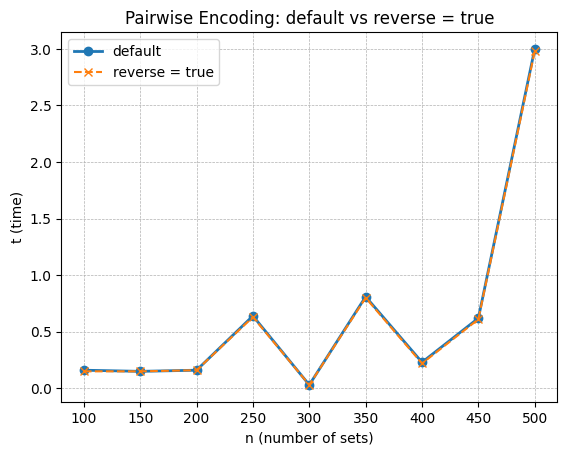

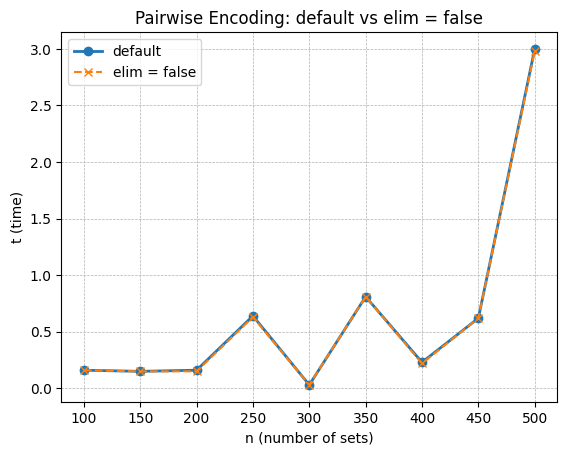

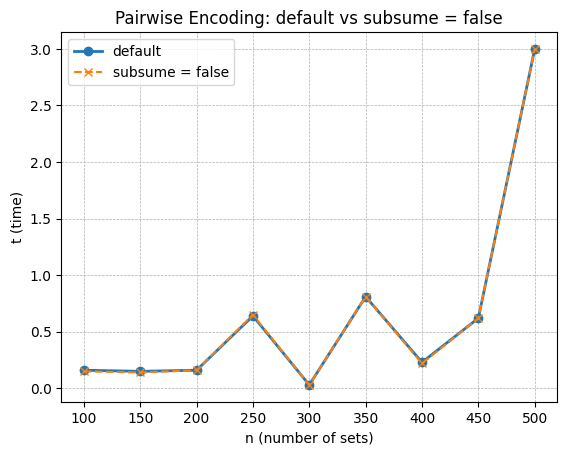

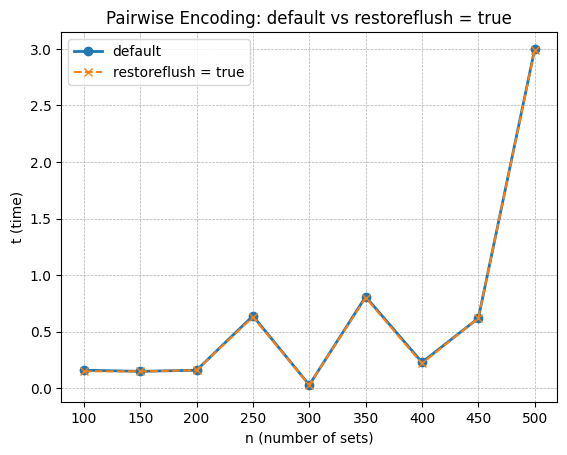

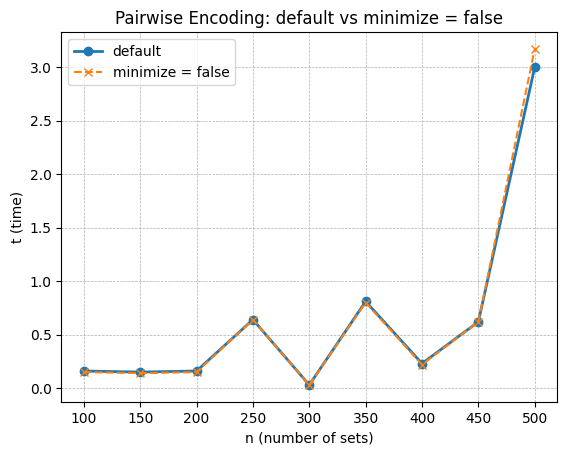

In [23]:
x_pts_k = [i for i in range(100, 550, 50)]

y_pairwise = [h[0] for h in pairwise]
y_bump_false = [h[0] for h in pairwise_bump_false]
y_reduceint_200 = [h[0] for h in pairwise_reduceint_200]
y_vivify_false = [h[0] for h in pairwise_vivify_false]
y_reverse_true = [h[0] for h in pairwise_reverse_true]
y_elim_false = [h[0] for h in pairwise_elim_false]
y_subsume_false = [h[0] for h in pairwise_subsume_false] 
y_restoreflush_true = [h[0] for h in pairwise_restoreflush_true] 
y_minimize_false = [h[0] for h in pairwise_minimize_false] 

parameters = [
    (y_bump_false, "bump = false"),
    (y_reduceint_200, "reduceint = 200"),
    (y_vivify_false, "vivify = false"),
    (y_reverse_true, "reverse = true"),
    (y_elim_false, "elim = false"),
    (y_subsume_false, "subsume = false"), 
    (y_restoreflush_true, "restoreflush = true"),
    (y_minimize_false, "minimize = false") 
]

for y_param, label in parameters:
    plt.figure()
    
    plt.plot(x_pts_k, y_pairwise, label="default", linestyle='-', marker='o', linewidth=2)
    plt.plot(x_pts_k, y_param, label=label, linestyle='--', marker='x')

    formatter = ScalarFormatter(useOffset=True)
    formatter.set_scientific(True)
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.xlabel('n (number of sets)')
    plt.ylabel('t (time)')
    plt.title(f'Pairwise Encoding: default vs {label}')
    
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


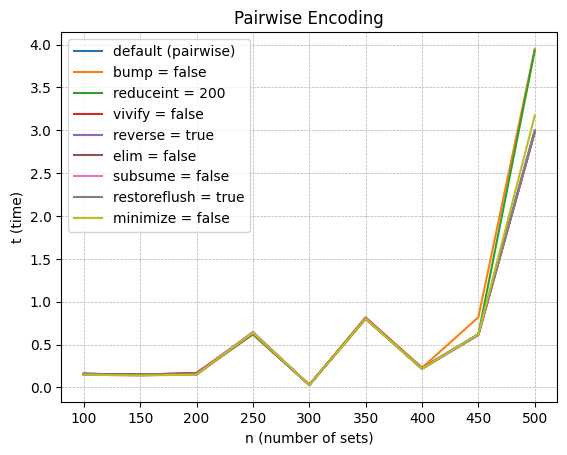

In [25]:
plt.figure()

plt.plot(x_pts_k, y_pairwise, label="default (pairwise)")
plt.plot(x_pts_k, y_bump_false, label="bump = false")
plt.plot(x_pts_k, y_reduceint_200, label="reduceint = 200")
plt.plot(x_pts_k, y_vivify_false, label="vivify = false")
plt.plot(x_pts_k, y_reverse_true, label="reverse = true")
plt.plot(x_pts_k, y_elim_false, label="elim = false")
plt.plot(x_pts_k, y_subsume_false, label="subsume = false")
plt.plot(x_pts_k, y_restoreflush_true, label="restoreflush = true")
plt.plot(x_pts_k, y_minimize_false, label="minimize = false")

formatter = ScalarFormatter(useOffset=True)
formatter.set_scientific(True)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('n (number of sets)')
plt.ylabel('t (time)')
plt.title('Pairwise Encoding')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
